<a href="https://colab.research.google.com/github/joanby/trading-algoritmico-a-z-con-python/blob/main/ES_TA_Cap%C3%ADtulo_08_bis_Aplicaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://www.quantreo.com/wp-content/uploads/2021/10/Original-on-Transparent.png" align="left" hspace="10px" vspace="0px">
<img alt="Colaboratory logo" height="45px" src="https://static-881c.kxcdn.com/wp-content/uploads/2016/03/frogamesLogoFull4.png" align="left" hspace="10px" vspace="0px"></p>

#  Machine Learning con estrategia Intra Diaria


<br>


💰 Únete a la comunidad de [Discord](https://discord.gg/wXjNPAc5BH)

📚 Puedes leer nuestro libro en [Amazon](https://www.amazon.com/gp/product/B09HG18CYL)

🖥️ El canal de [YouTube de Quantreo's](https://www.youtube.com/channel/UCp7jckfiEglNf_Gj62VR0pw) (en inglés) y el de [Frogames](https://www.youtube.com/channel/UCMUxXNYrVCv6-bQakhomvBg) en español




In [25]:
! pip install yfinance
! pip install ta

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
import ta

In [27]:
import matplotlib as mpl
from matplotlib import cycler

colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")
plt.rc('figure', facecolor='#313233')

# Funciones

In [61]:
def lin_reg_trading(symbol):
  def preprocessing_min(name):

    # Import the data
    df = pd.read_csv(f'./FOREX M1/{name}_1m.csv', index_col=0 , parse_dates=True).dropna()
    return df

  def feature_engineering(df):
    """ Crear nuevas variables"""
    
    # We copy the dataframe to avoid interferences in the data
    df_copy = df.dropna().copy()
    
    # Create the returns
    df_copy["returns"] = df_copy["close"].pct_change(1)

    # Create the SMAs
    df_copy["SMA 15"] = df_copy[["close"]].rolling(15).mean().shift(1)
    df_copy["SMA 60"] = df_copy[["close"]].rolling(60).mean().shift(1)
    
    # Create the volatilities
    df_copy["MSD 10"] = df_copy[["returns"]].rolling(10).std().shift(1)
    df_copy["MSD 30"] = df_copy[["returns"]].rolling(30).std().shift(1)
    
    # Create the Rsi
    RSI = ta.momentum.RSIIndicator(df_copy["close"], window= 14, fillna = False)
    df_copy["rsi"] = RSI.rsi()
    
    return df_copy.dropna()
  

  # Import the data
  df = preprocessing_min(symbol)

  dfc = feature_engineering(df)

  # Percentage train set
  split = int(0.80*len(dfc))

  # Train set creation
  X_train = dfc[['SMA 15', 'SMA 60', 'MSD 10', 'MSD 30', 'rsi']].iloc[:split]
  y_train = dfc[["returns"]].iloc[:split]


  # Test set creation
  X_test = dfc[['SMA 15', 'SMA 60', 'MSD 10', 'MSD 30', 'rsi']].iloc[split:]
  y_test = dfc[["returns"]].iloc[split:]

  # Import the class
  from sklearn.linear_model import LinearRegression

  # Initialize the class
  reg = LinearRegression()

  # Fit the model
  reg.fit(X_train, y_train)

  # Create predictions for the whole dataset
  X = np.concatenate((X_train, X_test), axis=0)

  dfc["prediction"] = reg.predict(X)

  # Compute the position
  dfc["position"] = np.sign(dfc["prediction"])

  # Compute the returns
  dfc["strategy"] = dfc["returns"] * dfc["position"].shift(1)


  return dfc["strategy"][dfc["strategy"]<0.50]

# Aplicación

<AxesSubplot:xlabel='Datetime'>

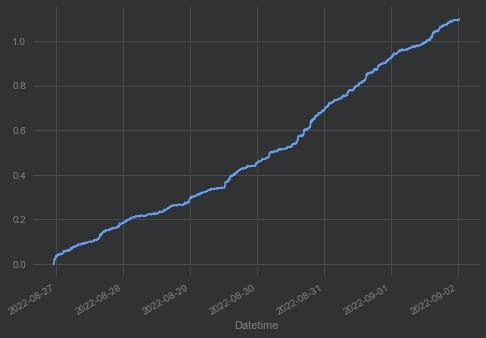

In [62]:
 lin_reg_trading("ETH-USD").cumsum().plot()

<AxesSubplot:xlabel='Datetime'>

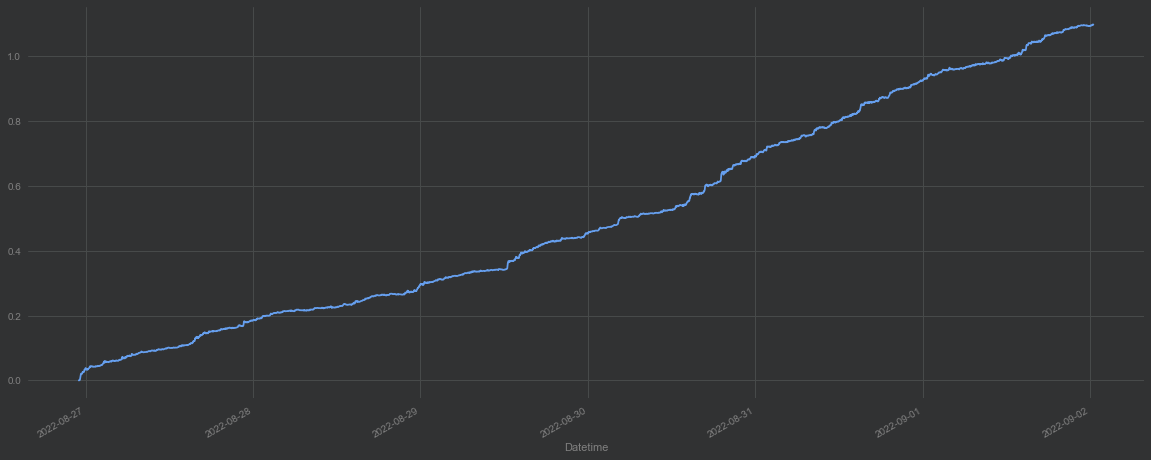

In [69]:
# List of assets
symbols_forex = [
    "AUDCAD=X","AUDCHF=X","AUDJPY=X","AUDNZD=X","AUDUSD=X","CADCHF=X","CADJPY=X",
    "CHFJPY=X","EURAUD=X","EURCAD=X","EURCHF=X","EURGBP=X","EURJPY=X","EURNZD=X",
    "EURUSD=X","GBPAUD=X","GBPCAD=X","GBPCHF=X","GBPJPY=X","GBPNZD=X","GBPUSD=X",
    "NZDCAD=X","NZDCHF=X","NZDJPY=X","NZDUSD=X","USDCAD=X","USDCHF=X","USDJPY=X",
                 ]

symbols_forex_winners = [
    "AUDCAD=X","AUDCHF=X","AUDNZD=X","AUDUSD=X","CADCHF=X","CADJPY=X",
    "GBPCAD=X","GBPCHF=X","GBPJPY=X","GBPUSD=X",
    "NZDCAD=X","USDCHF=X"
                 ]

symbols_indices = [
    '^NDX', '^GSPC', '^IBEX', 
]

symbols_commodities = [
    'GC=F', 'SI=F', 'CL=F',
]

symbols_tresuries = ['^TNX',
                     #'00774B.TW',
                     ]

symbols_crypto = [
    #'BTC-USD',
    'ETH-USD',
]

             
listnames = symbols_crypto #+ symbols_forex + symbols_indices
             #+symbols_tresuries
             #+symbols_commodities

interval = '5m'
returns = pd.DataFrame()

# Compute the return of each strategy
for name in listnames:
  returns[name] = lin_reg_trading(name)

# Plot the results
(returns.dropna().sum(axis=1)/returns.shape[1]).cumsum().plot(figsize=(20,8))

In [70]:
pf = returns.dropna().sum(axis=1)/returns.shape[1]

In [71]:
def drawdown_function(serie):

  # We compute Cumsum of the returns
  cum = serie.dropna().cumsum() + 1

  # We compute max of the cumsum on the period (accumulate max) # (1,3,5,3,1) --> (1,3,5,5,5)
  running_max = np.maximum.accumulate(cum)

  # We compute drawdown
  drawdown = cum/running_max - 1
  return drawdown

In [73]:
(pf.dropna().cumsum().iloc[-1]) / -np.min(drawdown_function(pf.dropna()))

192.59112984047505

In [75]:
# Dataframe vacío
values = pd.DataFrame(index=["BENEFICIO (%)", "DRAWDOWN (%)", "RETURN DRAWDOWN RATIO", "NUMBER OF OPERATIONS"])

# Calculamos retorno/drawdown
for col in returns.columns:
  ret = (returns[col].dropna().cumsum().iloc[-1])*100
  dd = -np.min(drawdown_function(returns[col].dropna()))*100
  ret_dd = ret/dd
  num_op = returns[col].dropna().shape[0]
  
  values[col] = ret,dd,ret_dd, num_op

values.transpose().sort_values(by="RETURN DRAWDOWN RATIO", ascending=False)

,BENEFICIO (%),DRAWDOWN (%),RETURN DRAWDOWN RATIO,NUMBER OF OPERATIONS
ETH-USD,109.796304,0.570101,192.59113,8677.0
